# Mount data from Google drive

In [91]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

raw_data=pd.read_csv("/content/drive/My Drive/train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
data_frame_obj = raw_data.select_dtypes(['object'])
#strip the trailing spaces
raw_data[data_frame_obj.columns] = data_frame_obj.apply(lambda x: x.str.strip())
raw_data.columns = raw_data.columns.str.strip()

# b) Remove the units from some of the attributes and only keep the numerical values (for example remove kmpl from “Mileage”, CC from “Engine”, bhp from “Power”, and lakh from “New_price”).

In [93]:
# Remove units from mentioned attributes
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+.\d+)').astype(float)
raw_data['Engine'] = raw_data['Engine'].str.extract('(\d+)').astype(float)
raw_data['Power'] = raw_data['Power'].str.extract('(\d+)').astype(float)
raw_data['New_Price'] = raw_data['New_Price'].str.extract('(\d+.\d+)').astype(float)
raw_data.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.0,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,NaN,1199.0,88.0,5.0,8.61,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.0,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.0,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.0,5.0,NaN,3.50


# a)Look for the missing values in all the columns and either impute them (replace with mean, median, or mode) or drop them. Justify your action for this task.     

In [94]:
# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 3
Engine                 36
Power                  36
Seats                  38
New_Price            5046
Price                   0
dtype: int64


<Axes: ylabel='Mileage'>

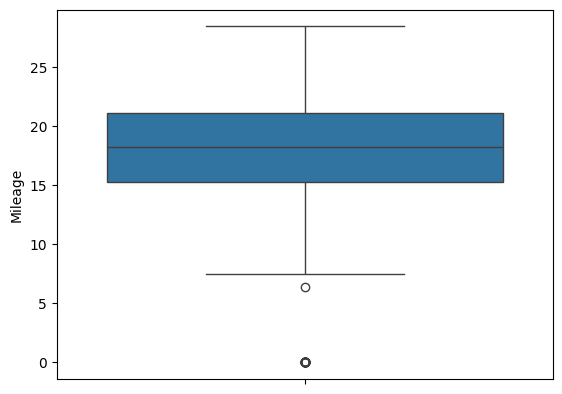

In [95]:
sns.boxplot(raw_data.Mileage)

<Axes: ylabel='Engine'>

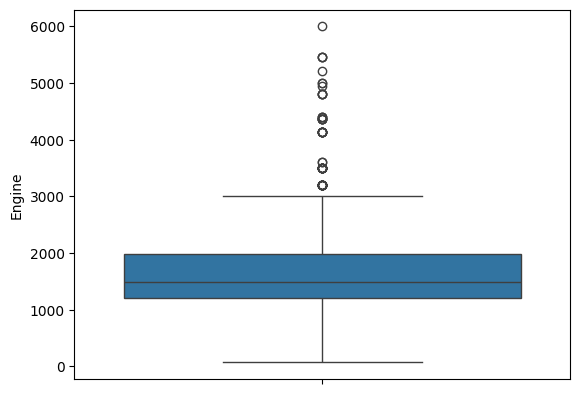

In [96]:
sns.boxplot(raw_data.Engine)

<Axes: ylabel='Power'>

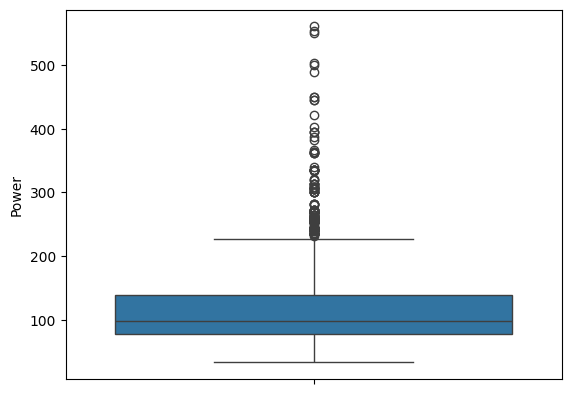

In [97]:
sns.boxplot(raw_data.Power)

In [98]:
#replace Mileage, Engine and power columns with their medians respectively
raw_data['Mileage'].fillna(raw_data['Mileage'].median(), inplace=True)
raw_data['Engine'].fillna(raw_data['Engine'].median(), inplace=True)
raw_data['Power'].fillna(raw_data['Power'].median(), inplace=True)

#replace seats column with its mode value
raw_data['Seats'].fillna(raw_data['Seats'].mode()[0], inplace=True)

#drop new price column
raw_data.drop('New_Price', axis=1, inplace=True)

In [99]:
# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [100]:
#save the clean file to data_clean
clean_dat=raw_data.to_csv('/content/drive/My Drive/cleaned_dataset.csv')

# C) Change the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot encoded value.

In [101]:
data=pd.read_csv('/content/drive/My Drive/cleaned_dataset.csv')
# One-hot encode categorical variables
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner_Type'].unique())

['Diesel' 'Petrol' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [102]:
data['Fuel_Type'].replace({'Diesel': 0, 'Petrol': 1, 'Electric': 2}, inplace=True)
data['Transmission'].replace({'Manual': 0, 'Automatic': 1}, inplace=True)
data['Owner_Type'].replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}, inplace=True)
data.head(5)

#save the one hot encoded file
one_hot_encoded_file = '/content/drive/My Drive/one_hot_encoded_data.csv'
data.to_csv(one_hot_encoded_file, index=False)

# d) Create one more feature and add this column to the dataset (you can use mutate function in R for this). For example, you can calculate the current age of the car by subtracting “Year” value from the current year.   

In [103]:
#clauculate current age of the car
from datetime import datetime

# Calculate current year
present_year = datetime.now().year

# Create new feature for current age of the car
data['Current_Age'] = present_year - data['Year']

In [104]:
print(min(data['Price']))

0.44


In [105]:
print(max(data['Price']))

160.0


In [106]:
# Create a new category column based on price ranges
budget_range = (0, 50)
mid_range = (50, 100)
luxury_range = (100, float('inf'))

def Price_category(price):
    if price <= 50:
        return 'Budget'
    elif price <= 100:
        return 'Mid-range'
    else:
        return 'Luxury'

# Apply categorize_price function to create 'Price Category' column
data['Price Category'] = data['Price'].apply(Price_category)

# Print the DataFrame with Price Category
print(data)

      Unnamed: 0.1  Unnamed: 0                              Name    Location  \
0                0           1  Hyundai Creta 1.6 CRDi SX Option        Pune   
1                1           2                      Honda Jazz V     Chennai   
2                2           3                 Maruti Ertiga VDI     Chennai   
3                3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore   
4                4           6            Nissan Micra Diesel XV      Jaipur   
...            ...         ...                               ...         ...   
5842          5842        6014                  Maruti Swift VDI       Delhi   
5843          5843        6015          Hyundai Xcent 1.1 CRDi S      Jaipur   
5844          5844        6016             Mahindra Xylo D4 BSIV      Jaipur   
5845          5845        6017                Maruti Wagon R VXI     Kolkata   
5846          5846        6018             Chevrolet Beat Diesel   Hyderabad   

      Year  Kilometers_Driven  Fuel_Typ

In [107]:
#save the new columns
new_columns_file = '/content/drive/My Drive/new_columns_file.csv'
data.to_csv(new_columns_file, index=False)

# e) Perform select, filter, rename, mutate, arrange and summarize with group by operations (or their equivalent operations in python) on this dataset.

In [108]:
# Selecting specific columns
selected_data = data[['Name', 'Location', 'Mileage', 'Price']]
print(selected_data)

                                  Name    Location  Mileage  Price
0     Hyundai Creta 1.6 CRDi SX Option        Pune    19.67  12.50
1                         Honda Jazz V     Chennai    18.19   4.50
2                    Maruti Ertiga VDI     Chennai    20.77   6.00
3      Audi A4 New 2.0 TDI Multitronic  Coimbatore    15.20  17.74
4               Nissan Micra Diesel XV      Jaipur    23.08   3.50
...                                ...         ...      ...    ...
5842                  Maruti Swift VDI       Delhi    28.40   4.75
5843          Hyundai Xcent 1.1 CRDi S      Jaipur    24.40   4.00
5844             Mahindra Xylo D4 BSIV      Jaipur    14.00   2.90
5845                Maruti Wagon R VXI     Kolkata    18.90   2.65
5846             Chevrolet Beat Diesel   Hyderabad    25.44   2.50

[5847 rows x 4 columns]


In [109]:
# Filtering data
filtered_data = data[data['Transmission'] == 1]
print(filtered_data)

      Unnamed: 0.1  Unnamed: 0                               Name    Location  \
3                3           4    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
5                5           7  Toyota Innova Crysta 2.8 GX AT 8S      Mumbai   
9                9          11        Honda City 1.5 V AT Sunroof     Kolkata   
11              11          13   Land Rover Range Rover 2.2L Pure       Delhi   
12              12          14     Land Rover Freelander 2 TD4 SE        Pune   
...            ...         ...                                ...         ...   
5829          5829        6001          Audi A6 2011-2015 2.0 TDI       Kochi   
5834          5834        6006   Mercedes-Benz M-Class ML 320 CDI      Mumbai   
5836          5836        6008            Porsche Panamera Diesel   Hyderabad   
5837          5837        6009                Toyota Camry Hybrid      Mumbai   
5839          5839        6011            Skoda Superb 3.6 V6 FSI   Hyderabad   

      Year  Kilometers_Driv

In [110]:
# Renaming columns
renamed_data = data.rename(columns={'Name': 'Car Model', 'Location': 'City'})
print(renamed_data)

      Unnamed: 0.1  Unnamed: 0                         Car Model        City  \
0                0           1  Hyundai Creta 1.6 CRDi SX Option        Pune   
1                1           2                      Honda Jazz V     Chennai   
2                2           3                 Maruti Ertiga VDI     Chennai   
3                3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore   
4                4           6            Nissan Micra Diesel XV      Jaipur   
...            ...         ...                               ...         ...   
5842          5842        6014                  Maruti Swift VDI       Delhi   
5843          5843        6015          Hyundai Xcent 1.1 CRDi S      Jaipur   
5844          5844        6016             Mahindra Xylo D4 BSIV      Jaipur   
5845          5845        6017                Maruti Wagon R VXI     Kolkata   
5846          5846        6018             Chevrolet Beat Diesel   Hyderabad   

      Year  Kilometers_Driven  Fuel_Typ

In [111]:
# Mutating data
data['Fuel_efficiency_rating'] = pd.cut(data['Mileage'], bins=[0, 15, 20, float('inf')], labels=['Low', 'Medium', 'High'])
print(data)

      Unnamed: 0.1  Unnamed: 0                              Name    Location  \
0                0           1  Hyundai Creta 1.6 CRDi SX Option        Pune   
1                1           2                      Honda Jazz V     Chennai   
2                2           3                 Maruti Ertiga VDI     Chennai   
3                3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore   
4                4           6            Nissan Micra Diesel XV      Jaipur   
...            ...         ...                               ...         ...   
5842          5842        6014                  Maruti Swift VDI       Delhi   
5843          5843        6015          Hyundai Xcent 1.1 CRDi S      Jaipur   
5844          5844        6016             Mahindra Xylo D4 BSIV      Jaipur   
5845          5845        6017                Maruti Wagon R VXI     Kolkata   
5846          5846        6018             Chevrolet Beat Diesel   Hyderabad   

      Year  Kilometers_Driven  Fuel_Typ

In [112]:
# Arranging data by a column
arranged_data = data.sort_values(by='Name')
print(arranged_data)

      Unnamed: 0.1  Unnamed: 0                            Name   Location  \
1182          1182        1221  Ambassador Classic Nova Diesel    Chennai   
383            383         398       Audi A3 35 TDI Attraction    Chennai   
4643          4643        4782          Audi A3 35 TDI Premium     Mumbai   
4845          4845        4989     Audi A3 35 TDI Premium Plus     Mumbai   
1897          1897        1954       Audi A3 35 TDI Technology      Delhi   
...            ...         ...                             ...        ...   
3918          3918        4044                   Volvo XC60 D5  Ahmedabad   
3808          3808        3933                   Volvo XC60 D5  Hyderabad   
1140          1140        1178       Volvo XC60 D5 Inscription      Kochi   
4364          4364        4497  Volvo XC90 2007-2015 D5 AT AWD      Kochi   
2326          2326        2401     Volvo XC90 2007-2015 D5 AWD      Kochi   

      Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage

In [113]:
# Summarizing data with group by operation
summary_data = data.groupby('Name')['Price'].mean()
print(summary_data)

Name
Ambassador Classic Nova Diesel     1.350000
Audi A3 35 TDI Attraction         16.500000
Audi A3 35 TDI Premium            19.250000
Audi A3 35 TDI Premium Plus       18.900000
Audi A3 35 TDI Technology         22.500000
                                    ...    
Volvo XC60 D4 Summum              18.250000
Volvo XC60 D5                     19.433333
Volvo XC60 D5 Inscription         17.180000
Volvo XC90 2007-2015 D5 AT AWD    23.580000
Volvo XC90 2007-2015 D5 AWD       23.650000
Name: Price, Length: 1804, dtype: float64
